In [8]:
# Initialize libraries and functions
import cv2
import numpy as np
import math
import random
import time
from prettytable import PrettyTable
from IPython.display import clear_output

In [9]:
class particle:
    def __init__(self,position=(0,0),velocity=(0,0),init_time=0,source_id=0,part_type='wave'):
        self.velocity=velocity
        self.position=position
        self.init_time=init_time
        self.energy=velocity
        self.source_id=source_id
        self.type=part_type

    def move(self):
        time_diff=1
        position=list(self.position)
        position[0]+=self.velocity[0]*time_diff
        position[1]+=self.velocity[1]*time_diff
        self.position=position

    def __del__(self):
        pass

In [11]:
play_back_speed=1
size=1

img = np.zeros((700*size,1000*size,3), np.uint8)
resize=size
cv2.namedWindow("Visualisation", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Visualisation", int(img.shape[1]/resize), int(img.shape[0]/resize))

discrete_count=2
initial_radius=3
initial_radius_particle=2
particles=[]

# for l in Points:
#     for k in range(discrete_count):
#         temp_coor=(int(l[0][0]+(initial_radius+i-l[1])*math.cos(math.radians(k/discrete_count*360))),
#                 int(l[0][1]+(initial_radius+i-l[1])*math.sin(math.radians(k/discrete_count*360))))
#         temp_vel=(math.cos(math.radians(k/discrete_count*360)),
#                 math.sin(math.radians(k/discrete_count*360)))
#         tmp_particle = particle(position=temp_coor,velocity=temp_vel,init_time=i,source_id=Points.index(l))
#         particles.append(tmp_particle)
#         del tmp_particle

Points=[[(4*img.shape[1]//16,3*img.shape[0]//4),0],[(9*img.shape[1]//16,3*img.shape[0]//4),0]]
Points=[[(4*img.shape[1]//16,3*img.shape[0]//4),0],[(12*img.shape[1]//16,3*img.shape[0]//4),0]]
# Points=[[(2*img.shape[1]//16,3*img.shape[0]//4),0],[(14*img.shape[1]//16,3*img.shape[0]//4),0],[(6*img.shape[1]//16+1,3*img.shape[0]//4),0]]
i=0
rad_point_ang=0
rad_point_spd=2
temp_vel=(rad_point_spd*math.cos(math.radians(rad_point_ang)),
          rad_point_spd*math.sin(math.radians(rad_point_ang)))
tmp_particle = particle(position=Points[0][0],velocity=temp_vel,init_time=i,part_type='wave')
particles.append(tmp_particle)
del tmp_particle


play_flag=False

energy_flag=1
particle_collision=0
colour_flag=1

doppler_flag=1

temp_vel=(-0.5,0)
temp_vel=(0.5,0)
# temp_vel=(-0,0)


tmp_particle = particle(position=Points[1][0],velocity=temp_vel,init_time=i,part_type='heavy')
particles.append(tmp_particle)
del tmp_particle
if(len(Points)>2):
    tmp_particle = particle(position=Points[2][0],velocity=(0,0),init_time=i,part_type='heavy')
    particles.append(tmp_particle)
    del tmp_particle

i=0
# while(i<1500):
while(len(particles)!=0):
    repeat_time=500
    #rpi=500,rad_point_spd=2,4,12
    #2,14
    if(i%repeat_time==(repeat_time-1)):
        temp_vel=(rad_point_spd*math.cos(math.radians(rad_point_ang)),rad_point_spd*math.sin(math.radians(rad_point_ang)))
        tmp_particle = particle(position=Points[0][0],velocity=temp_vel,init_time=i,part_type='wave')
        particles.append(tmp_particle)
        del tmp_particle
    if(doppler_flag):
        if((i-10)%repeat_time==(repeat_time-1)):
            temp_vel=(rad_point_spd*math.cos(math.radians(rad_point_ang)),rad_point_spd*math.sin(math.radians(rad_point_ang)))
            tmp_particle = particle(position=Points[0][0],velocity=temp_vel,init_time=i,part_type='wave')
            particles.append(tmp_particle)
            del tmp_particle

    if(len(particles)==0):
        break

    img = np.zeros((img.shape), np.uint8)

    for j in range(180):
        temp_coor=(int(Points[0][0][0]+((100*math.cos(math.radians(j+90)))+95)),int(Points[0][0][1]+((100*math.sin(math.radians(j+90))))))
        cv2.circle(img, (temp_coor),2, (255,0,0), -1)
    # cv2.circle(img, (800,120),0, (255,0,0), -1)
    # cv2.circle(img, (Points[0][0]),0, (255,0,0), -1)
    # cv2.line(img, (800,100), (810,110), (255,0,0), 1)

    pop_particles=[]
    particle_position={}
    # print(len(particles))
    for j in range(len(particles)):
        if(j not in pop_particles):
            if(i-particles[j].init_time>initial_radius_particle):
                particles[j].move()
            temp_coor=list(particles[j].position)
            temp_coor[0]=int(temp_coor[0])
            temp_coor[1]=int(temp_coor[1])
            temp_coor=tuple(temp_coor)
            if(temp_coor not in particle_position):
                particle_position[temp_coor]=[particles[j].velocity,j]
                if(temp_coor[0]>0 and temp_coor[0]<img.shape[1] and temp_coor[1]>0 and temp_coor[1]<img.shape[0]):
                    if((img[temp_coor[1],temp_coor[0],0])==255 and (img[temp_coor[1],temp_coor[0],1])==0 and (img[temp_coor[1],temp_coor[0],2])==0):
                        # l=[temp_coor,i]
                        # Points.append(l)
                        pop_particles.append(j)
                        # for k in range(discrete_count):
                        #     temp_coor=(int(l[0][0]+(initial_radius_particle+i-l[1])*math.cos(math.radians(k/discrete_count*360))),
                        #             int(l[0][1]+(initial_radius_particle+i-l[1])*math.sin(math.radians(k/discrete_count*360))))
                        #     temp_vel=(math.cos(math.radians(k/discrete_count*360)),
                        #             math.sin(math.radians(k/discrete_count*360)))
                        #     tmp_particle = particle(position=temp_coor,velocity=temp_vel,init_time=i,source_id=Points.index(l))
                        #     particles.append(tmp_particle)
                        #     del tmp_particle
                    # elif((img[temp_coor[1],temp_coor[0],1])!=0):
                    #     pass
                    else:
                        if(particles[j].type=='heavy'):
                            cv2.line(img, (temp_coor[0],temp_coor[1]-50),(temp_coor[0],temp_coor[1]+50), (0,0,255), 1)
                        else:
                            if(energy_flag):
                                change_vel=math.sqrt((particles[j].energy[0])**2+(particles[j].energy[1])**2)-math.sqrt((particles[j].velocity[0])**2+(particles[j].velocity[1])**2);tmp_energy_val=abs(int(255*(change_vel)));tmp_energy_val_col = tmp_energy_val if tmp_energy_val<=255 else 255
                                if(change_vel>0):
                                    cv2.circle(img, temp_coor,3, (0,255,tmp_energy_val_col), -1)
                                elif(change_vel<0):
                                    cv2.circle(img, temp_coor,3, (tmp_energy_val_col,255,0), -1)
                                else:
                                    cv2.circle(img, temp_coor,3, (0,255,0), -1)
                            else:
                                cv2.circle(img, temp_coor,3, (0,255,0), -1)
                else:
                    pop_particles.append(j)
            else:
                # if(i-particles[j].init_time>3):
                tmp_vel_1=list(particles[particle_position[temp_coor][1]].velocity)
                tmp_vel_2=list(particles[j].velocity)
                tmp_set=set()
                tmp_set.add(particles[particle_position[temp_coor][1]].type)
                tmp_set.add(particles[j].type)
                if not (energy_flag):
                    if(len(tmp_set)==1):
                        if(particle_collision):
                            particles[particle_position[temp_coor][1]].velocity=tmp_vel_2
                            particles[j].velocity=tmp_vel_1
                    else:
                        if(particles[j].type=='heavy'):
                            tmp_vel_1[0]=-tmp_vel_1[0]+2*tmp_vel_2[0]
                            tmp_vel_1[1]=-tmp_vel_1[1]+2*tmp_vel_2[1]
                            particles[particle_position[temp_coor][1]].velocity=tmp_vel_1
                        else:
                            tmp_vel_2[0]=-tmp_vel_2[0]+2*tmp_vel_1[0]
                            tmp_vel_2[1]=-tmp_vel_2[1]+2*tmp_vel_1[1]
                            particles[j].velocity=tmp_vel_2
                else:
                    if(len(tmp_set)==1):
                        if(particle_collision):
                            particles[particle_position[temp_coor][1]].velocity=tmp_vel_2
                            particles[j].velocity=tmp_vel_1
                    else:
                        if(particles[j].type=='heavy'):
                            tmp_vel_1[0]=-tmp_vel_1[0]
                            tmp_vel_1[1]=-tmp_vel_1[1]
                            particles[particle_position[temp_coor][1]].velocity=tmp_vel_1
                            tmp_vel_3=(tmp_vel_1[0]+2*tmp_vel_2[0],tmp_vel_1[1]+2*tmp_vel_2[1])
                            if(colour_flag):
                               particles[particle_position[temp_coor][1]].energy=tmp_vel_3
                        else:
                            tmp_vel_2[0]=-tmp_vel_2[0]
                            tmp_vel_2[1]=-tmp_vel_2[1]
                            particles[j].velocity=tmp_vel_2
                            tmp_vel_3=(tmp_vel_2[0]+2*tmp_vel_1[0],tmp_vel_2[1]+2*tmp_vel_1[1])
                            if(colour_flag):
                              particles[j].energy=tmp_vel_3
    pop_particles.sort(reverse=True)
    for j in pop_particles:
        particles.pop(j)
    i+=1
    print(i)
    cv2.imshow('Visualisation',img)
    if(play_flag):
        quit_k = cv2.waitKey(play_back_speed) & 0xFF
    else:
        quit_k = cv2.waitKey(0) & 0xFF
    clear_output(wait=True) 
    if quit_k == ord('q'):
        break
    if quit_k == ord('p'):
        play_flag=False
    if quit_k == ord('l'):
        play_flag=True

cv2.destroyAllWindows()

1


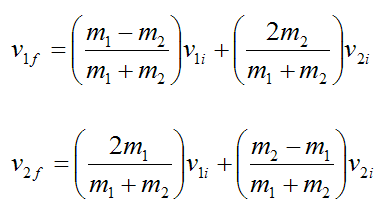

Substitue M1 = 0

V1f=V1i+2*V2i

V2f=V2i